## Introduction

I don't know about you, but one of the things that's been driving me crazy about using matplotlib throughout this entire course is the look of the plots. Though they serve their purpose, and allow us to explore our data, frankly, they're not very attractive. Fortunately, you're not stuck with the matplotlib default look and feel, and in this lesson, we'll learn all about matplotlib's extreme configurability, and see how to change the default appearance for all of our plots.

But, of course, before we can get started, like always, we'll need to run the standard setup code to get our Jupyter notebook ready to go.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## The `rcParams` Object

All of matplotlib's settings are stored in a global dict (or, more accurately, `dict` like object) called `rcParams` on the `matplotlib` module. The code below, displays this collection of default settings for us to peruse.

In [2]:
mpl.rcParams

RcParams({u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'mpeg4',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.html': u'none',
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.axisbelow': False,
          u'axes.edgecolor': u'k',
          u'axes.facecolor': u'w',
          u'axes.formatter.limits': [-7, 7],
          u'axes.formatter.use_locale': False,
          u'axes.formatter.use_mathtext': False,
          u'axes.formatter.useoffset': True,
          u'axes.grid': False,
          u'axes.grid.axis': u'both',
          u'axes.grid.which': u'major',
     

Judging by the size of the `rcParams` object, it looks like matplotlib gives us quite a bit of capability when it comes to changing its look and feel. And, all we need to do to make these changes, is simply update the values in this dictionary. But, before we start changing the default configuration of matplotlib, let's take one last look at a typical matplotlib plot just to remind ourselves of how they look.

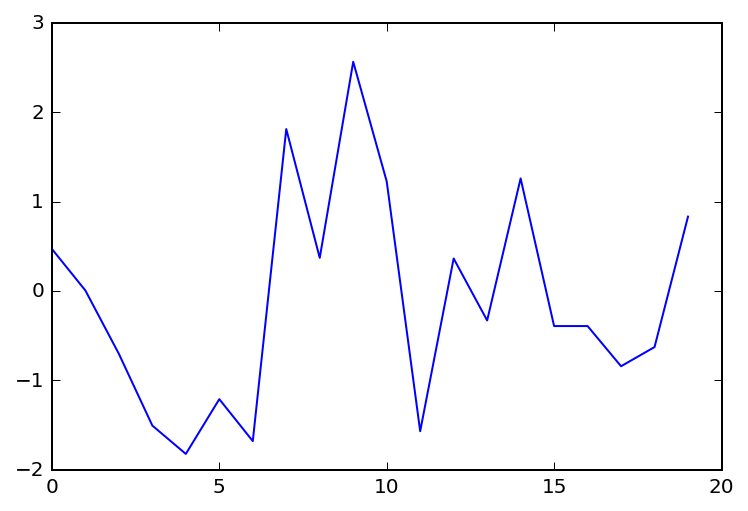

In [3]:
plt.plot(np.random.randn(20));

## Configuring matplotlib

Now, we're ready to start playing around with the look and feel of our plots. 

Since we created a simple line graph above, we'll stick with that as our example plot. So, let's see what kinds of things we can change with respect to the lines in our graphs.

The code below, loops through the `rcParams` object, and prints out only the line-specific keys and their corresponding default values.

In [4]:
for key, val in mpl.rcParams.items():
    if key.startswith('lines.'):
        print '%-40s:%s' % (key, val)

lines.markeredgewidth                   :0.5
lines.markersize                        :6.0
lines.solid_joinstyle                   :round
lines.marker                            :None
lines.linestyle                         :-
lines.linewidth                         :1.0
lines.solid_capstyle                    :projecting
lines.dash_capstyle                     :butt
lines.antialiased                       :True
lines.dash_joinstyle                    :round
lines.color                             :b


Hmm, it looks like there's quite a few settings we can change with respect to the appearance of the lines in our plots. Let's start with something simple, but obvious, like the width of the lines in our graphs. 

According to the list of key/value pairs we printed out in the previous cell, the current line width is just 1.0. Let's bump that up quite a bit to really make our lines stand out. Let's try, say 10.

In [5]:
mpl.rcParams['lines.linewidth'] = 10

Now, let's try our plot again and see how it looks with our default line width set to a value of 10.

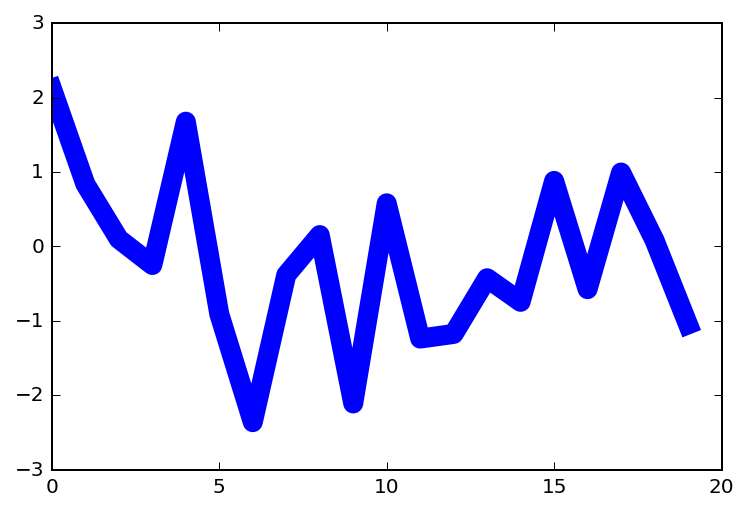

In [6]:
plt.plot(np.random.randn(20));

Well, that looks significantly different, but we can take it even further. 

Now, if we wanted to set several different line attributes, instead of just one, we could do exactly what we did above, which is to set each attribute individually, but matplotlib also provides a function called `rc` that allows us to set several attributes for a specific group with a single line of code. 

The code in the next cell uses the `matplotlib.rc` function to set the line width, style, and marker shape all with one function call.

In [7]:
mpl.rc('lines', linewidth=2, linestyle='--', marker='s')

And, now, we can run our line graph example again to see what kind of effect the last bit of code had on the look and feel of our plots.

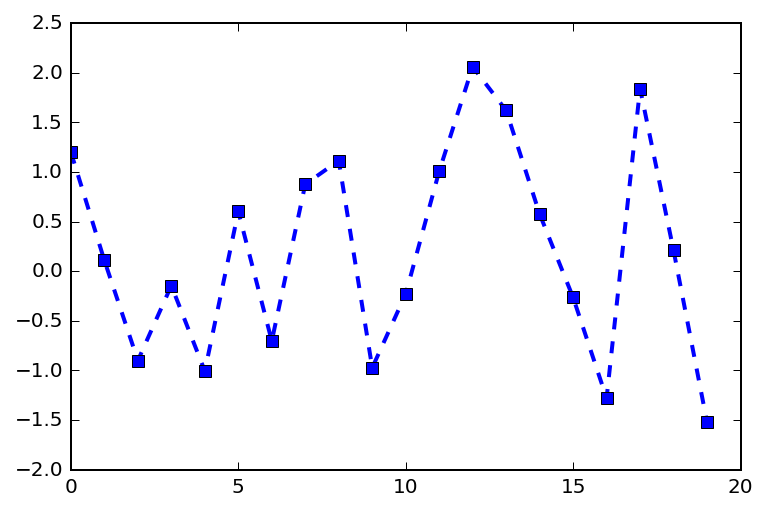

In [8]:
plt.plot(np.random.randn(20));

That's pretty cool that we can change the look and feel of all our plots with just a few lines of code. 

Now, we can create custom styles that look quite a bit better than the default appearance that ships with matplotlib. The only problem though, is that it's kind of a pain to copy and paste a bunch of commands to each notebook, script, or interactive terminal session to change the look and feel of our plots. If we've found a style that we like, wouldn't it be better if we could just make that our default style? 

Well, fortunately, you can! In fact, matplotlib makes this kind of configuration super easy. You simply need to create a file called `matplotlibrc` to hold your desired default settings.

## The matplotlibrc File

The `matplotlibrc` file can be stored in one of four different locations and matplotlib will look for this file in each location in the following order:

- First, you can add the file to your current working directory to give the current project its own specific custom set of properties. 

- Second, you can define the environment variable `$MATPLOTLIBRC` to the hold a directory where you would like to keep your global `matplotlibrc` file. 

- Next, you can place the file in your default config directory, which you can get by calling the `get_configdir` function. 

- Finally, if matplotlib cannot find a `matplotlibrc` file in one of these locations, it will load the file that was installed with matplotlib. 

This last location is the home of the default configuration file that comes with a standard matplotlib installation and you should never make any changes directly to it, but that doesn't mean that you can't take a look at its contents to get an idea of what a `matplotlibrc` file looks like. 

We can find this file by calling the `matplotlib_fname` function. This function will return the location of the file currently being used, and since we are currently using the default settings that matplotlib ships with, this should return the location of the default `matplotlibrc` file.

In [9]:
mpl.matplotlib_fname()

u'/Users/croach/anaconda/envs/mpl/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

Let's `cat` the file now to get a look at a typical matplotlibrc file.

In [10]:
!cat {mpl.matplotlib_fname()}

### MATPLOTLIBRC FORMAT

# This is a sample matplotlib configuration file - you can find a copy
# of it on your system in
# site-packages/matplotlib/mpl-data/matplotlibrc.  If you edit it
# there, please note that it will be overwritten in your next install.
# If you want to keep a permanent local copy that will not be
# overwritten, place it in the following location:
# unix/linux:
#     $HOME/.config/matplotlib/matplotlibrc or
#     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
# other platforms:
#     $HOME/.matplotlib/matplotlibrc
#
# See http://matplotlib.org/users/customizing.html#the-matplotlibrc-file for
# more details on the paths which are checked for the configuration file.
#
# This file is best viewed in a editor which supports python mode
# syntax highlighting. Blank lines, or lines starting with a comment
# symbol, are ignored, as are trailing comments.  Other lines must
# have the format
#    key : val # optional comment
#
# Colors: for the color 

As you can see, a `matplotlibrc` file just consists of a bunch of key/value pairs. The keys are all namespaced and each key is separated from its corresponding value by a colon. 

So, as an example, if you wanted to make the last set of changes we did by calling the `matplotlib.rc` function permanent, you would simply create a new `matplotlibrc` file in one of the three locations mentioned above, and add the following lines to that file to override the default look and feel.

```python
lines.marker                : s
lines.linestyle             : --
lines.linewidth             : 2.0
```

Let's go ahead and give that option a try now. In the next cell, we'll create a new `matplotlibrc` file in the default configuration directory and add to it the three lines above.

In [11]:
import os

matplotlibrc_location = os.path.join(mpl.get_configdir(), 'matplotlibrc')
matplotlib_content = """
lines.marker                : s
lines.linestyle             : --
lines.linewidth             : 2.0
"""

with open(matplotlibrc_location, 'w') as fout:
    fout.write(matplotlib_content.strip())

Now, to see the results of this change, we'll need to restart the kernel and then do the normal setup once again. I've copied the standard setup code below for convenience, so let's go ahead and restart the kernel now and see if our `matplotlibrc` file makes a difference.

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Now, if we call the `matploblib_fname` function again, we should see that matplotlib is now using our own `matplotlibrc` file that we just created, so let's give that a try now.

In [13]:
mpl.matplotlib_fname()

u'/Users/croach/.matplotlib/matplotlibrc'

And, that looks good, we're no longer using the default `matplotlibrc` file that comes with a standard install of matplotlib. Now, let's try our plot again and see if it looks like the one we made earlier after calling the `matplotlib.rc` function.

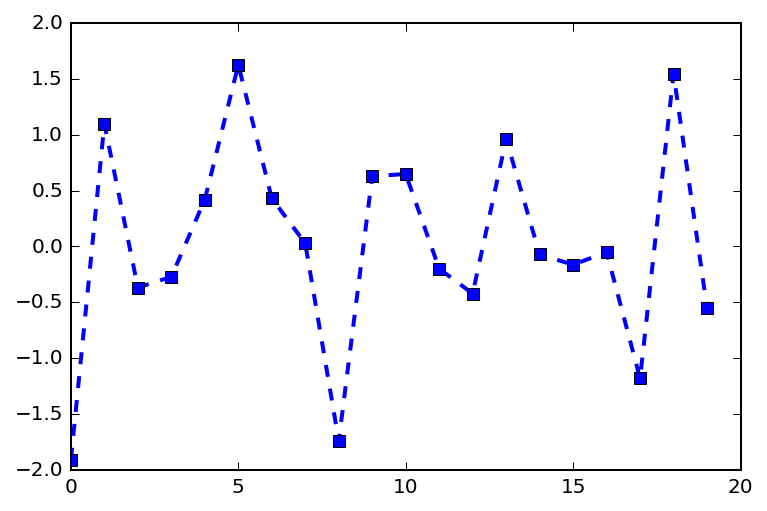

In [14]:
plt.plot(np.random.randn(20));

And, that looks exactly the same!

### Cleaning Up

Now, before we move on, let's just clean up our environment to make sure that we don't continue to see our plots using the obnoxious style that we just created. To do that, we simply need to remove the `matplotlibrc` file that we created above, and the code in the next cell does that for us.  

In [15]:
os.remove(matplotlibrc_location)

## Conclusion

And, that's also going to bring us to the very end of this lesson. To recap, we learned that we're not stuck with the default look and feel that matplotlib ships with. Oh no, in fact, matplotlib gives us a ton of control to modify the appearance of our plots and we can do so on either on the fly, through the direct manipulation of the `rcParams` object, or permanently by adding the default settings we want to a `matplotlibrc` file.